# Prueba Fundamentos Data Science

# Alumno: Nicolás Ramírez (Grupo con Eduardo Álvarez)

# Rendimiento Escolar

## Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas para perfilar a los estudiantes. 

## De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health ) y ver si éstas se pueden abstraer en categorías latentes.

# Preliminar

* Nos asignan realizar un modelo predictivo que nos permita determinar el promedio final del año escolar, de manera de poder identificar aquellos alumnos que presenten un bajo desempeño académico.

* Como estamos buscando un modelo que pueda predecir en forma exacta un valor para el promedio final del año escolar, es que utilizaremos una regresión lineal para el análisis ya que es un problema de regresión.

* Primero realizaremos un análisis exploratorio de la base, revisando la cantidad de datos, datos nulos, las características de las diversas variables, y procederemos a recodificar y binarizar las variables que correspondan que nos facilitará el análisis.

* Posteriormente realizaremos una modelación descriptiva de forma poder identificar las variables que tengan mayor porcentaje explicativo en relación a la variable objetivo, por lo tanto descartaremos las que no sean relevantes.

* Finalmente mediante un modelo de Regresión Lineal, entrenaremos un modelo que nos permita hacer la predicción del promedio final del año escolar.

* Evaluaremos el modelo mediante analizando el Error Cuadrático Medio ya que al ser un problema de regresión, este criterio nos permitirá obtener el modelo con el menor nivel de error promedio entre el modelo y los datos conocidos.

# Aspectos Computacionales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import missingno as msno
import helpers_prueba as hp
import factor_analyzer as factor

* Pandas para poder trabajar con Dataframes
* Numpy nos permite realizar operaciones con los Dataframes. Tiene mayor funcionalidades que las operaciones disponibles en Pandas
* Matplotlib y Seaborn nos permiten realizar gráficos
* scipy.stats sirve para poder utilizar funciones estadísticas y distribuciones de probabilidad
* statsmodels nos ayuda para realizar el análisis y modelación descriptiva
* sklearn nos ayuda para poder realizar finalmente el modelo predictivo
* missingno nos ayuda a visualizar lo NaN
* helpers_prueba nos entrega alguna funciones que sirven para complementar las librería previamente definidas
* factor:analyzer es el que nos ayudará para el análisis factorial para reducir dimensiones.

Leemos el la base, y vemos alguna información como cantidad de columnas, filas, tipo de variables, presencia de valores NaN y las 5 primeras filas.

In [2]:
df = pd.read_csv('students.csv', delimiter='|').drop('Unnamed: 0', axis=1)

In [3]:
df.shape

(395, 33)

In [4]:
df.dtypes

school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2             int64
G3            object
dtype: object

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


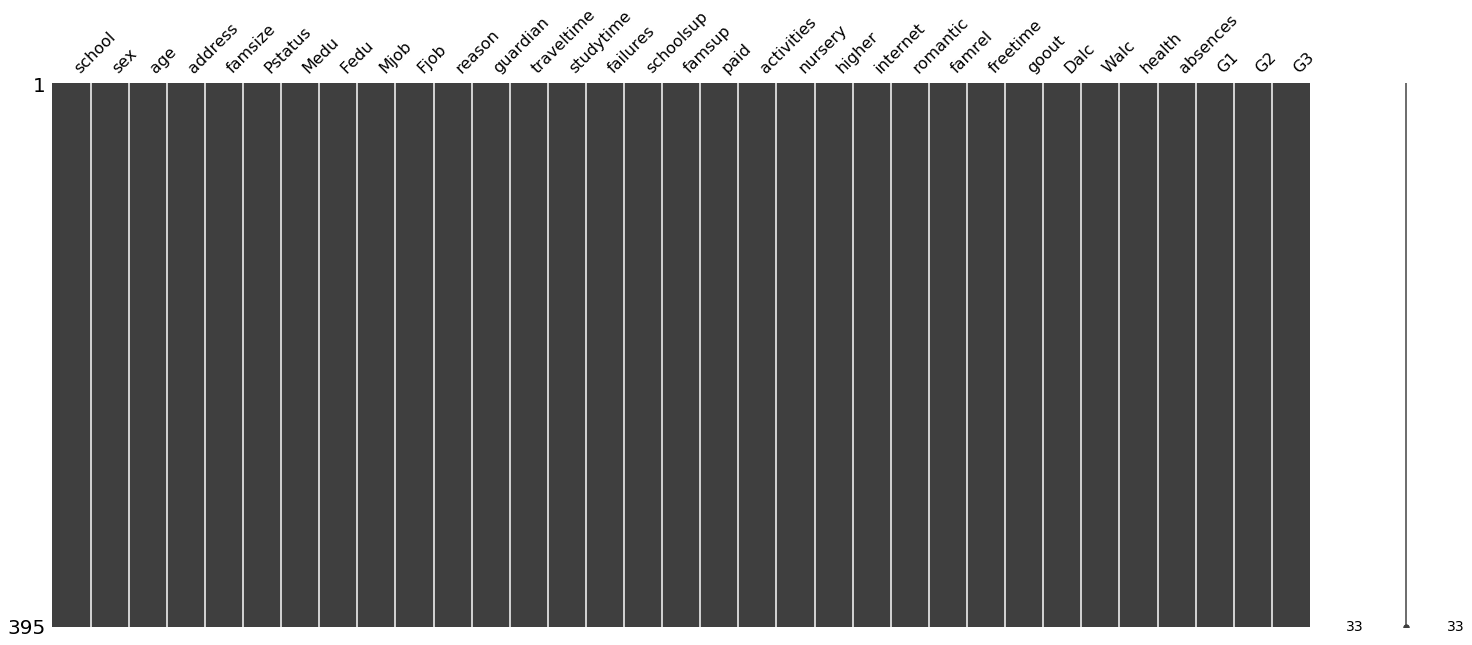

In [6]:
msno.matrix(df)

No hay valores NaN, sin embargo hay valores con el caracter 'nulidade', 'sem validade' y 'zero' que procederemos a reemplazar por NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null object
Fedu          395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null object
studytime     395 non-null object
failures      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null object
freetime      395 non-null object
goout         395 non-null object
Dalc       

In [8]:
df['health'].value_counts()

"5"             145
"3"              91
"4"              66
"2"              45
"1"              44
sem validade      3
zero              1
Name: health, dtype: int64

In [9]:
 df['Fedu'].isnull().value_counts()

False    395
Name: Fedu, dtype: int64

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [11]:
#Elimino de age, goout y health los  ""

df['age'] = df['age'].str.replace(r'"', '')
df['goout'] = df['goout'].str.replace(r'"', '')
df['health'] = df['health'].str.replace(r'"', '')


In [12]:
#Cambiamos los zero, sem validade y nulidade a 999 para poder pasar a int

columnas = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G3']
for i in columnas:
    df[i] = df[i].replace(['zero'], [None])
    df[i] = df[i].replace(['sem validade'], [None])
    df[i] = df[i].replace(['nulidade'], [None])

In [13]:
# cambiamos variables numéricas a formato float

columnas = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G3']

for i in columnas:
    df[i] = df[i].astype(float)

In [14]:
# cambio de variables binarias a formato 1 y 0

binarias = ['school', 'sex', 'address', 'famsize', 'Pstatus',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
len(binarias)

13

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float64
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null float64
Fedu          390 non-null float64
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null float64
studytime     390 non-null float64
failures      390 non-null float64
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null float64
freetime      393 non-null float64
goout         390 non-null float64
Da

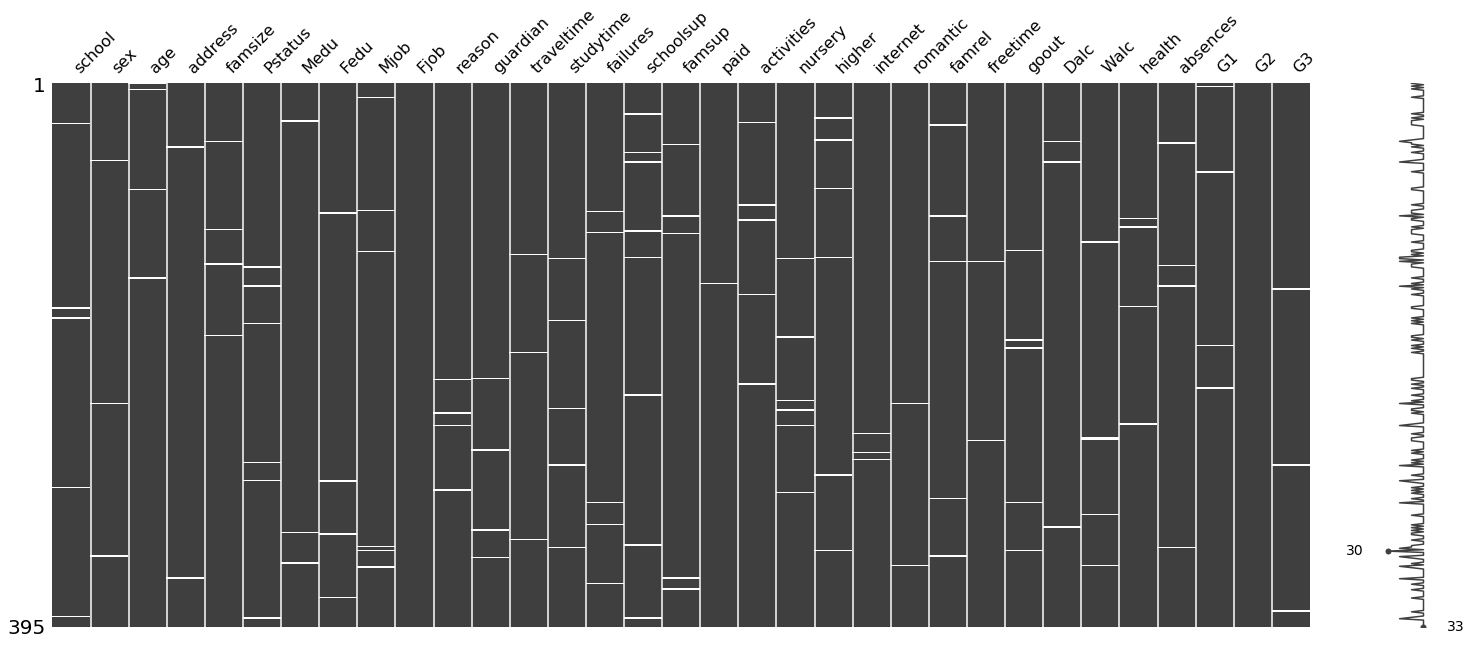

In [16]:
msno.matrix(df) 

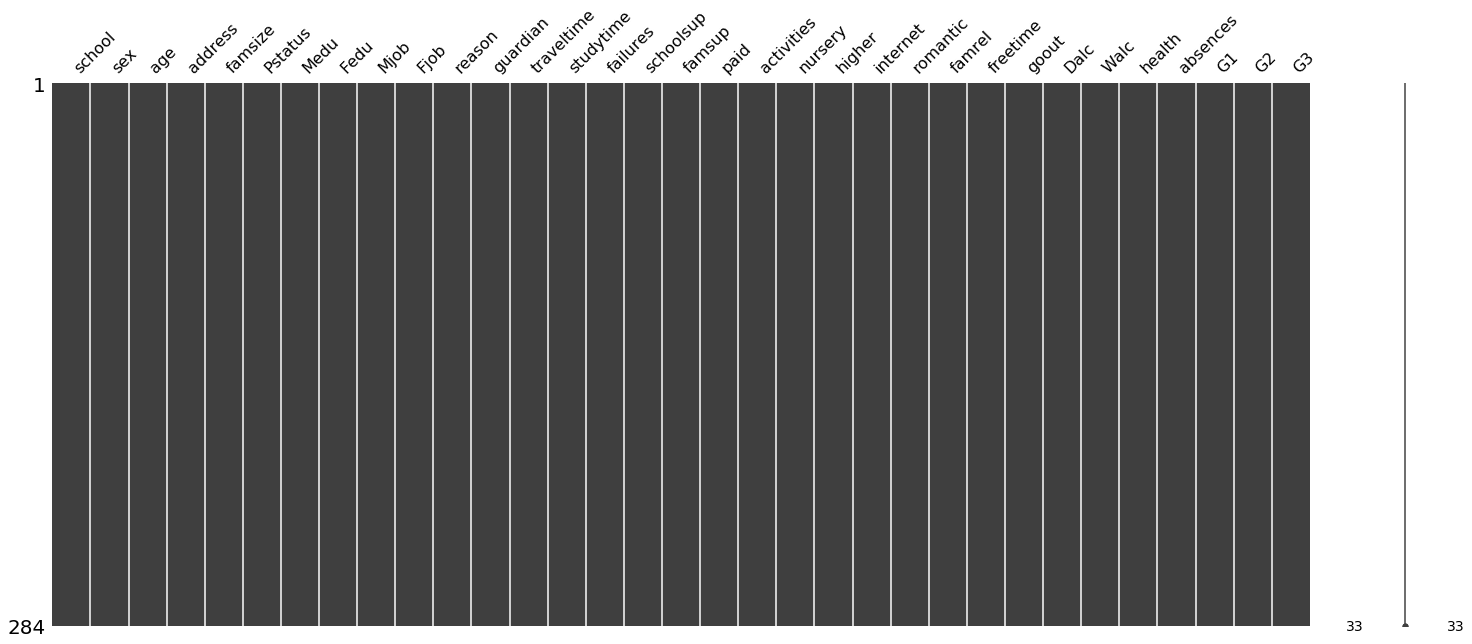

In [17]:
msno.matrix(df.dropna()) 

Ahora sí podemos ver que existen valores NaN, que en total corresponden a 111 filas que tiene al menos una variable con un valor NaN, que corresponde al 28,10 % del total de los datos.

Mantendremos los datos ya que es un alto porcentaje de datos perdidos en caso que se considere hacer un dropna.

Además revisando los valores de cada variable, vemos que la que tiene mayor cantidad de NaN son sólo 7 datos, por lo tanto me ratifica para seguir trabajando con la base completa, sin hacer dropna.


Comenzaremos con la binarización.

In [18]:
df['school'].value_counts()

GP    345
MS     45
Name: school, dtype: int64

In [19]:
df['school_bin'] = np.where(df['school'] == 'MS' , 1, 0)

In [20]:
df['sex'].value_counts()

F    206
M    186
Name: sex, dtype: int64

In [21]:
df['sex_bin'] = np.where(df['sex'] == 'M' , 1, 0)

In [22]:
df['address'].value_counts()

U    305
R     88
Name: address, dtype: int64

In [23]:
df['address_bin'] = np.where(df['address'] == 'R' , 1, 0)

In [24]:
df['famsize'].value_counts()

GT3    278
LE3    113
Name: famsize, dtype: int64

In [25]:
df['famsize_bin'] = np.where(df['famsize'] == 'LE3' , 1, 0)

In [26]:
df['Pstatus'].value_counts()

T    349
A     40
Name: Pstatus, dtype: int64

In [27]:
df['Pstatus_bin'] = np.where(df['Pstatus'] == 'A' , 1, 0)

In [28]:
df['schoolsup'].value_counts()

no     337
yes     50
Name: schoolsup, dtype: int64

In [29]:
df['schoolsup_bin'] = np.where(df['schoolsup'] == 'yes' , 1, 0)

In [30]:
df['famsup'].value_counts()

yes    239
no     151
Name: famsup, dtype: int64

In [31]:
df['famsup_bin'] = np.where(df['famsup'] == 'no' , 1, 0)

In [32]:
df['paid'].value_counts()

no     214
yes    180
Name: paid, dtype: int64

In [33]:
df['paid_bin'] = np.where(df['paid'] == 'yes' , 1, 0)

In [34]:
df['activities'].value_counts()

yes    199
no     191
Name: activities, dtype: int64

In [35]:
df['activities_bin'] = np.where(df['activities'] == 'no' , 1, 0)

In [36]:
df['nursery'].value_counts()

yes    309
no      80
Name: nursery, dtype: int64

In [37]:
df['nursery_bin'] = np.where(df['nursery'] == 'no' , 1, 0)

In [38]:
df['higher'].value_counts()

yes    369
no      20
Name: higher, dtype: int64

In [39]:
df['higher_bin'] = np.where(df['higher'] == 'no' , 1, 0)

In [40]:
df['internet'].value_counts()

yes    327
no      65
Name: internet, dtype: int64

In [41]:
df['internet_bin'] = np.where(df['internet'] == 'no' , 1, 0)

In [42]:
df['romantic'].value_counts()

no     262
yes    131
Name: romantic, dtype: int64

In [43]:
df['romantic_bin'] = np.where(df['romantic'] == 'yes' , 1, 0)

Cambio de variables nominales a formato 1 y 0

In [44]:

nominal = ['Mjob', 'Fjob', 'reason', 'guardian']

In [45]:
df['Mjob'].value_counts()

other       138
services    102
at_home      59
teacher      57
health       33
Name: Mjob, dtype: int64

In [46]:
df['Mjob_health_bin'] = np.where(df['Mjob'] == 'health' , 1, 0)
df['Mjob_teacher_bin'] = np.where(df['Mjob'] == 'teacher' , 1, 0)
df['Mjob_athome_bin'] = np.where(df['Mjob'] == 'at_home' , 1, 0)
df['Mjob_services_bin'] = np.where(df['Mjob'] == 'services' , 1, 0)

In [47]:
df['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [48]:
df['Fjob_health_bin'] = np.where(df['Fjob'] == 'health' , 1, 0)
df['Fjob_teacher_bin'] = np.where(df['Fjob'] == 'teacher' , 1, 0)
df['Fjob_athome_bin'] = np.where(df['Fjob'] == 'at_home' , 1, 0)
df['Fjob_services_bin'] = np.where(df['Fjob'] == 'services' , 1, 0)

In [49]:
df['reason'].value_counts()

course        144
home          108
reputation    103
other          36
Name: reason, dtype: int64

In [50]:
df['reason_other_bin'] = np.where(df['reason'] == 'other' , 1, 0)
df['reason_reputation_bin'] = np.where(df['reason'] == 'reputation' , 1, 0)
df['reason_home_bin'] = np.where(df['reason'] == 'home' , 1, 0)

In [51]:
df['guardian'].value_counts()

mother    270
father     89
other      32
Name: guardian, dtype: int64

In [52]:
df['guardian_other_bin'] = np.where(df['guardian'] == 'other' , 1, 0)
df['guardian_father_bin'] = np.where(df['guardian'] == 'father' , 1, 0)

# Descripción

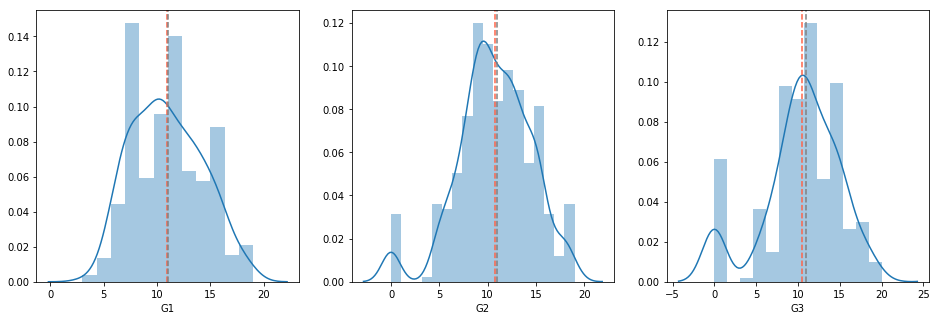

In [53]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1) 
sns.distplot(df['G1'].dropna())
plt.axvline(df['G1'].mean(), color= 'tomato', linestyle ='--')
plt.axvline(df['G1'].median(), color= 'grey', linestyle ='--')
plt.subplot(1,3,2)
sns.distplot(df['G2'].dropna())
plt.axvline(df['G2'].mean(), color= 'tomato', linestyle ='--')
plt.axvline(df['G2'].median(), color= 'grey', linestyle ='--')
plt.subplot(1,3,3) 
sns.distplot(df['G3'].dropna())
plt.axvline(df['G3'].mean(), color= 'tomato', linestyle ='--')
plt.axvline(df['G3'].median(), color= 'grey', linestyle ='--')

Se aprecia un comportamiento mas menos similar en G1, G2 y G3, donde tiende a ser normal y la media es similar en todos, lo mismo en la mediana.

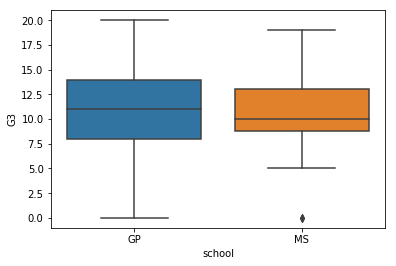

GP    0.884615
MS    0.115385
Name: school, dtype: float64


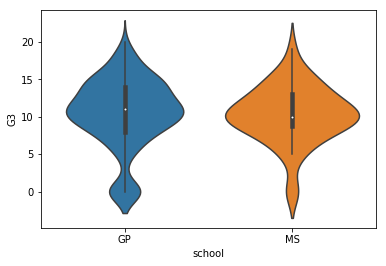

In [54]:
sns.boxplot(x=df['school'], y=df['G3'])
plt.show()
sns.violinplot(x=df['school'], y=df['G3'])
print(df['school'].value_counts('%'))

La mediana está más alto en GP, pero esta tiene una mayor dispersión en los datos. En General no se aprecia mayor diferencia entre ambos.

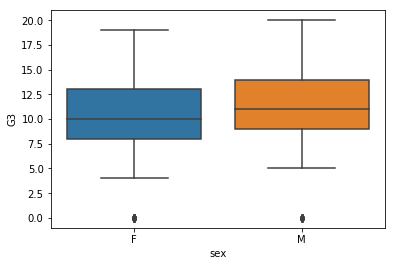

F    0.52551
M    0.47449
Name: sex, dtype: float64


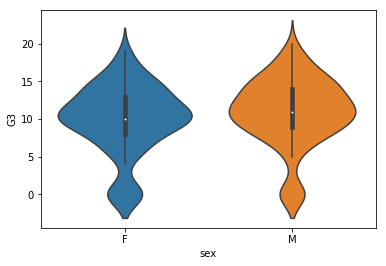

In [55]:
sns.boxplot(x=df['sex'], y=df['G3'])
plt.show()
sns.violinplot(x=df['sex'], y=df['G3'])
print(df['sex'].value_counts('%'))

Ambos, Hombres y Mujeres presentan comportamientos muy similares, aunque en los hombre pareciera ser un poco más alto, aunque difícil determinar si es significativo.

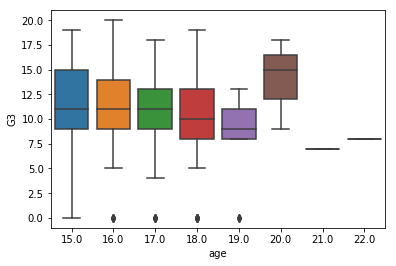

16.0    0.258312
17.0    0.250639
15.0    0.209719
18.0    0.207161
19.0    0.061381
20.0    0.007673
21.0    0.002558
22.0    0.002558
Name: age, dtype: float64


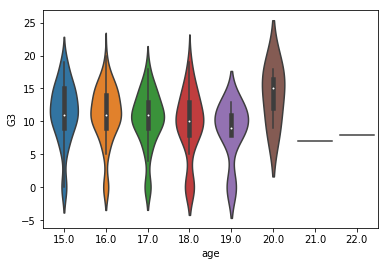

In [56]:
sns.boxplot(x=df['age'], y=df['G3'])
plt.show()
sns.violinplot(x=df['age'], y=df['G3'])
print(df['age'].value_counts('%'))

No se aprecian mayores diferencias, excepto a los 2 años, dondese aprecian unos puntajes mayores de G3, aunque también por la poca cantidad de datos es posible que sea un sesgo, ya que 20 años corresponde a menos del 1% del total de datos.

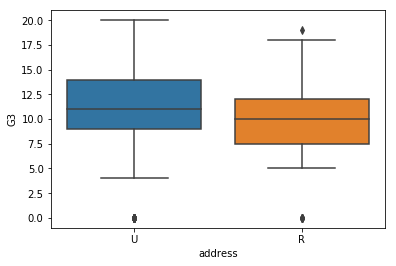

U    0.776081
R    0.223919
Name: address, dtype: float64


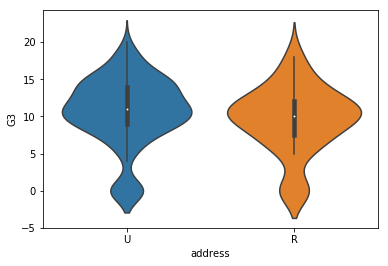

In [57]:
sns.boxplot(x=df['address'], y=df['G3'])
plt.show()
sns.violinplot(x=df['address'], y=df['G3'])
print(df['address'].value_counts('%'))

En la dirección no se aprecia una diferencia significativa entre ambos.

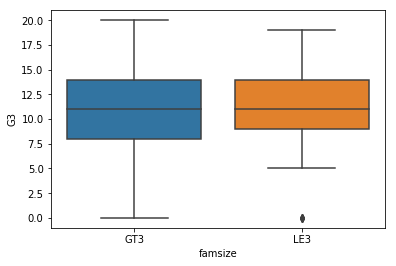

GT3    0.710997
LE3    0.289003
Name: famsize, dtype: float64


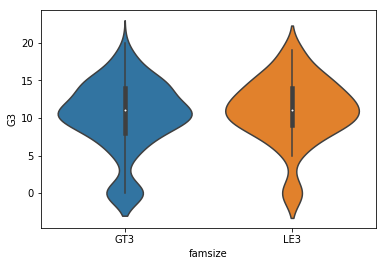

In [58]:
sns.boxplot(x=df['famsize'], y=df['G3'])
plt.show()
sns.violinplot(x=df['famsize'], y=df['G3'])
print(df['famsize'].value_counts('%'))

En famsize no se aprecia una diferencia significativa entre ambos.

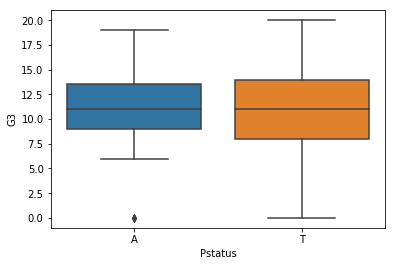

T    0.897172
A    0.102828
Name: Pstatus, dtype: float64


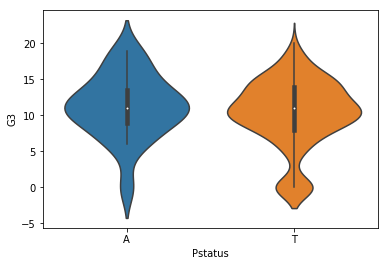

In [59]:
sns.boxplot(x=df['Pstatus'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Pstatus'], y=df['G3'])
print(df['Pstatus'].value_counts('%'))

En Pstatus no se aprecia una diferencia significativa entre ambos.

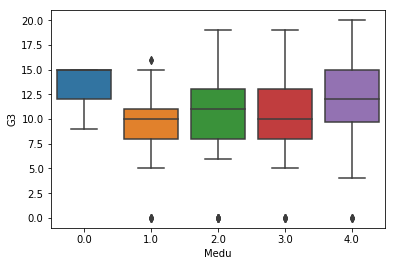

4.0    0.329082
2.0    0.262755
3.0    0.250000
1.0    0.150510
0.0    0.007653
Name: Medu, dtype: float64


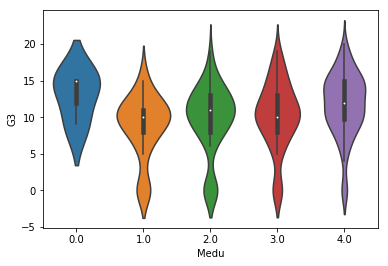

In [60]:
sns.boxplot(x=df['Medu'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Medu'], y=df['G3'])
print(df['Medu'].value_counts('%'))

En el caso de Nivel educacional de la madre puntaje 0 la muestra es muy baja por lo tanto lo descartaría del anáisis.
Para el caso de Nivel educacional 4, pareciera que si hay una diferencia donde los puntajes son un poco más altos.

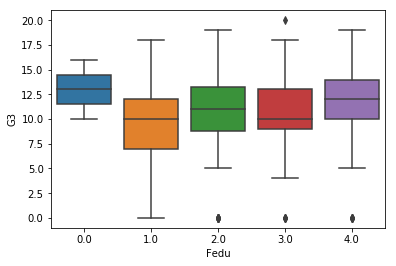

2.0    0.287179
3.0    0.256410
4.0    0.243590
1.0    0.207692
0.0    0.005128
Name: Fedu, dtype: float64


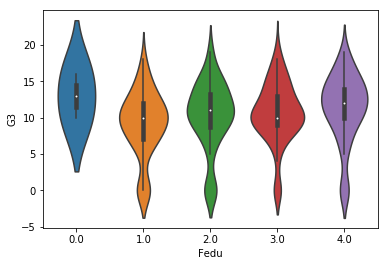

In [61]:
sns.boxplot(x=df['Fedu'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Fedu'], y=df['G3'])
print(df['Fedu'].value_counts('%'))

En el caso de Nivel educacional del padre puntaje 0 la muestra es muy baja por lo tanto lo descartaría del anáisis. Para el caso de Nivel educacional 4, pareciera que si hay una diferencia donde los puntajes son un poco más altos, igual que en el  caso del nivel educacional de la madre.

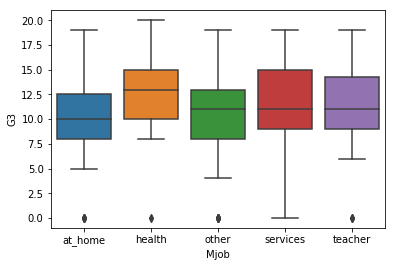

other       0.354756
services    0.262211
at_home     0.151671
teacher     0.146530
health      0.084833
Name: Mjob, dtype: float64


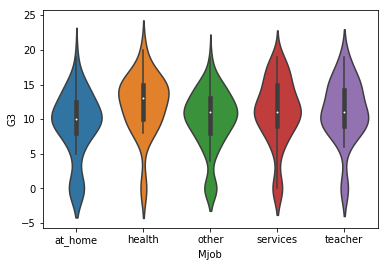

In [62]:
sns.boxplot(x=df['Mjob'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Mjob'], y=df['G3'])
print(df['Mjob'].value_counts('%'))

En general no se aprecia mayores diferencias al comparar visualmente. Sólo health podría estar un poco más alto.

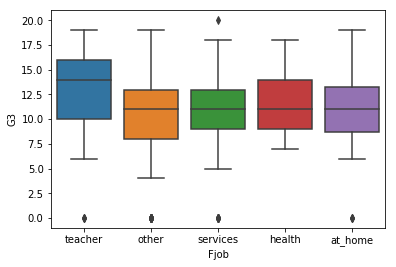

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64


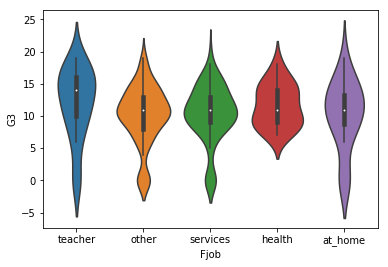

In [63]:
sns.boxplot(x=df['Fjob'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Fjob'], y=df['G3'])
print(df['Fjob'].value_counts('%'))

En general no se aprecia mayores diferencias al comparar visualmente. Sólo teacher podría estar un poco más alto.

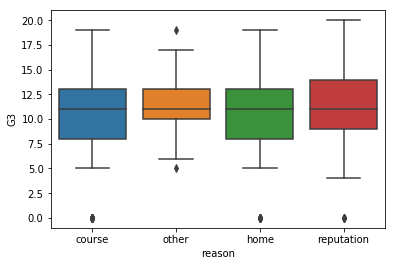

course        0.368286
home          0.276215
reputation    0.263427
other         0.092072
Name: reason, dtype: float64


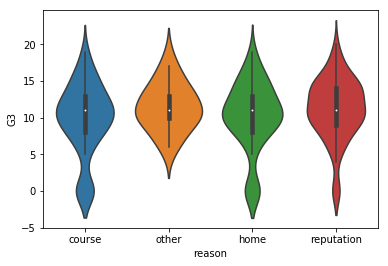

In [64]:
sns.boxplot(x=df['reason'], y=df['G3'])
plt.show()
sns.violinplot(x=df['reason'], y=df['G3'])
print(df['reason'].value_counts('%'))

En el caso de reason, nos veo mayor diferencia entre las distintas razones de elegir un colegio. 

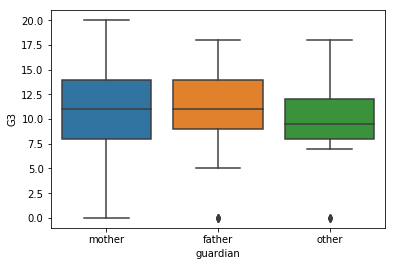

mother    0.690537
father    0.227621
other     0.081841
Name: guardian, dtype: float64


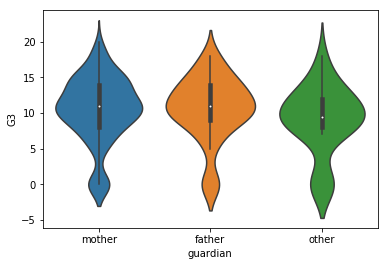

In [65]:
sns.boxplot(x=df['guardian'], y=df['G3'])
plt.show()
sns.violinplot(x=df['guardian'], y=df['G3'])
print(df['guardian'].value_counts('%'))

En el caso de guardian, tampoco se aprecia mayor diferencia en el puntaje.

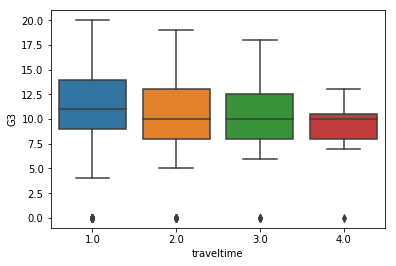

1.0    0.647959
2.0    0.272959
3.0    0.058673
4.0    0.020408
Name: traveltime, dtype: float64


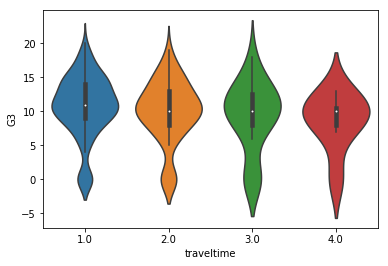

In [66]:
sns.boxplot(x=df['traveltime'], y=df['G3'])
plt.show()
sns.violinplot(x=df['traveltime'], y=df['G3'])
print(df['traveltime'].value_counts('%'))

En el caso de traveltime, pareciera que la opción 1 (<15 minutos) es levemente mayor al resto, aunque difícil determinar si es significativo.

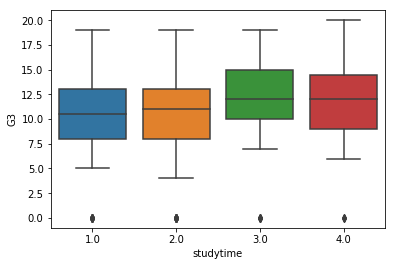

2.0    0.497436
1.0    0.266667
3.0    0.166667
4.0    0.069231
Name: studytime, dtype: float64


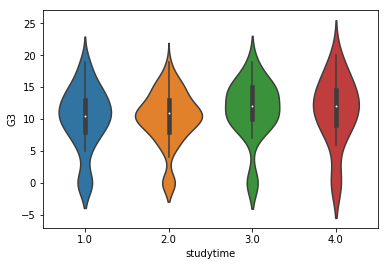

In [67]:
sns.boxplot(x=df['studytime'], y=df['G3'])
plt.show()
sns.violinplot(x=df['studytime'], y=df['G3'])
print(df['studytime'].value_counts('%'))

En el caso de studytime se pnesaría que a mayor horas de estudio mayor puntaje de G3. Acá vemos que la opción 3 tiende a ser mayor que el resto. En la opción 4 se ve un poco más bajo que 3, pero mayor que las opciones 1 y 2. 

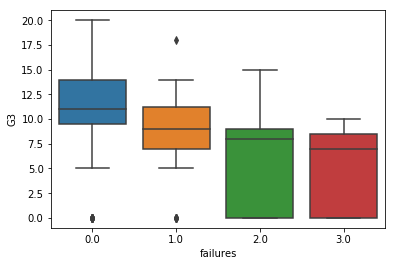

0.0    0.789744
1.0    0.125641
2.0    0.043590
3.0    0.041026
Name: failures, dtype: float64


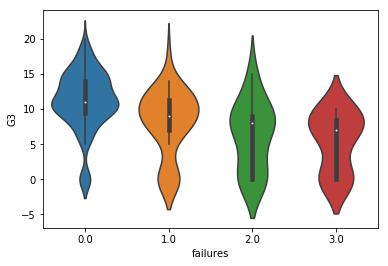

In [68]:
sns.boxplot(x=df['failures'], y=df['G3'])
plt.show()
sns.violinplot(x=df['failures'], y=df['G3'])
print(df['failures'].value_counts('%'))

Tiene bastante sentido que a menor cantidad de clases reprobadas, mayor el puntaje, ya que se reprueba al tener un puntaje bajo, y acá se aprecia con bastante diferencia que a menor cantidad de clases el puntaje G3 es más alto.

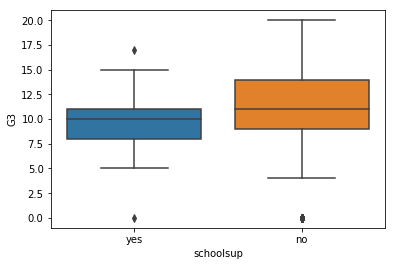

no     0.870801
yes    0.129199
Name: schoolsup, dtype: float64


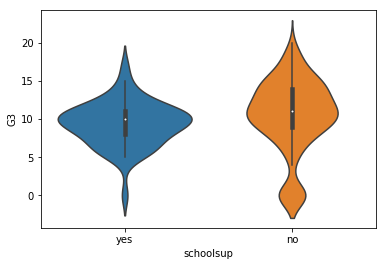

In [69]:
sns.boxplot(x=df['schoolsup'], y=df['G3'])
plt.show()
sns.violinplot(x=df['schoolsup'], y=df['G3'])
print(df['schoolsup'].value_counts('%'))

En cuanto al apoyo educacional del colegio, se pensaría que si hay apoyo ayudaría en los puntajes, sin embargo no se aprecia eso. De hecho pareciera que si no hay apoyo las nots pueden ser ligeramente mayores, aunque no es muy claro si esta diferencia es significativa.

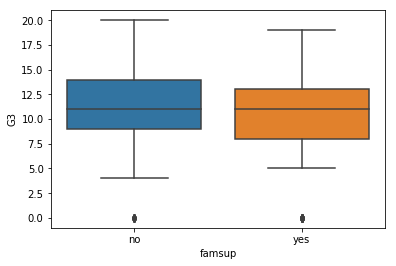

yes    0.612821
no     0.387179
Name: famsup, dtype: float64


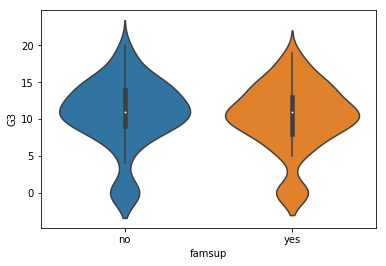

In [70]:
sns.boxplot(x=df['famsup'], y=df['G3'])
plt.show()
sns.violinplot(x=df['famsup'], y=df['G3'])
print(df['famsup'].value_counts('%'))

Al igual que en el anterior, pensaría que con el apoyo familiar los putnajes serían mayores. Acá pareciera en el caso sin apoyo podría ser levemente mayor, aunque no hay claridad si esta diferencia es significativa.

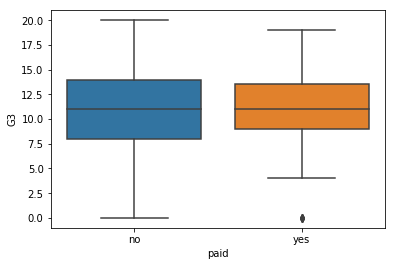

no     0.543147
yes    0.456853
Name: paid, dtype: float64


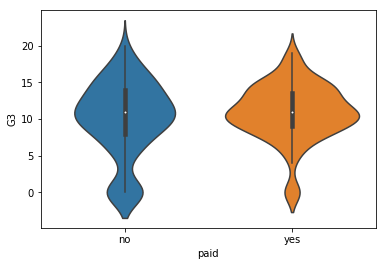

In [71]:
sns.boxplot(x=df['paid'], y=df['G3'])
plt.show()
sns.violinplot(x=df['paid'], y=df['G3'])
print(df['paid'].value_counts('%'))

No se aprecia mayor diferencia entre ambos, aunque pareciera que el tener clases particulares ayudarían más que a tener un mayor puntaje, sino que a no obtener puntajes tan bajos. Hay una mayor variabilidad en el caso de los que no tienen clases particulares.

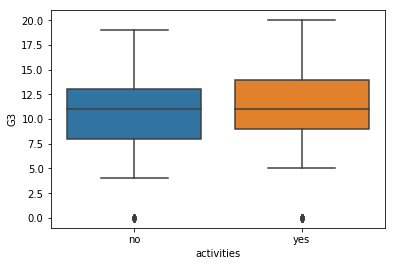

yes    0.510256
no     0.489744
Name: activities, dtype: float64


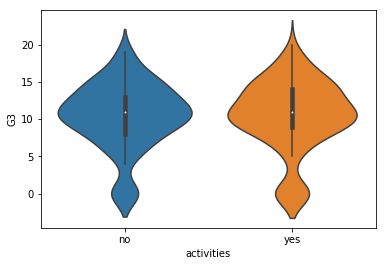

In [72]:
sns.boxplot(x=df['activities'], y=df['G3'])
plt.show()
sns.violinplot(x=df['activities'], y=df['G3'])
print(df['activities'].value_counts('%'))

Quienes tienen actividades extracurriculares pareciera haber una pequeña diferencia con los que no, sin embargo es difícil determinar si es significativo.

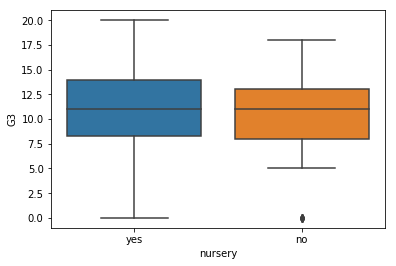

yes    0.794344
no     0.205656
Name: nursery, dtype: float64


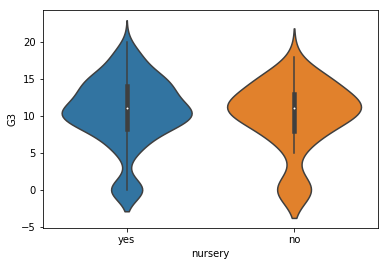

In [73]:
sns.boxplot(x=df['nursery'], y=df['G3'])
plt.show()
sns.violinplot(x=df['nursery'], y=df['G3'])
print(df['nursery'].value_counts('%'))

No se ve mayor diferencia entre ambos casos, sólo en el caso que si asistió se ve una mayor varianza, aunque puede ser por la cantidad de datos.

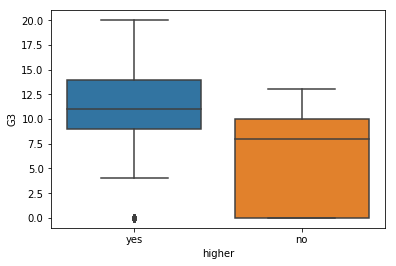

yes    0.948586
no     0.051414
Name: higher, dtype: float64


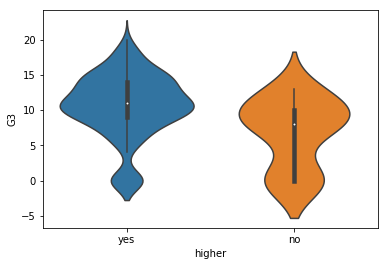

In [74]:
sns.boxplot(x=df['higher'], y=df['G3'])
plt.show()
sns.violinplot(x=df['higher'], y=df['G3'])
print(df['higher'].value_counts('%'))

Aquí si se aprecia una diferencia importante, siendo quienes quieren proseguir con estudios superiores los que tienen mayores puntajes.

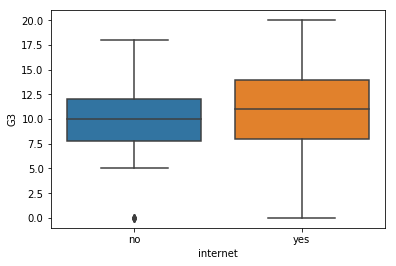

yes    0.834184
no     0.165816
Name: internet, dtype: float64


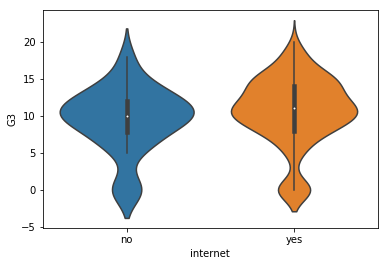

In [75]:
sns.boxplot(x=df['internet'], y=df['G3'])
plt.show()
sns.violinplot(x=df['internet'], y=df['G3'])
print(df['internet'].value_counts('%'))

En general no se ve mayor diferencia entre ambos, sólo mayor varianza en los que sí tienen internet, pero difícil indicar is es algo significativo.

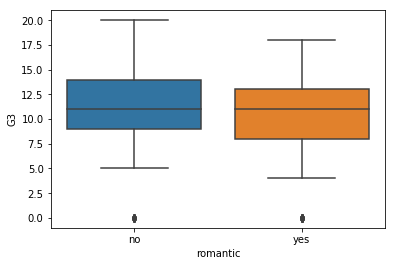

no     0.666667
yes    0.333333
Name: romantic, dtype: float64


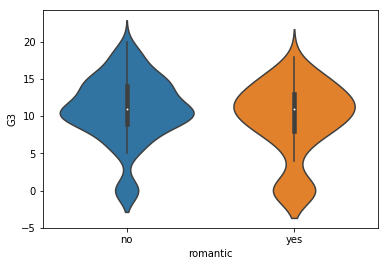

In [76]:
sns.boxplot(x=df['romantic'], y=df['G3'])
plt.show()
sns.violinplot(x=df['romantic'], y=df['G3'])
print(df['romantic'].value_counts('%'))

Pareciera que quienes no están en una relación romántica tienen una tendencia algo mayor a tener mejores puntajes, aunque es difícil determinar si la diferencia es significativa.

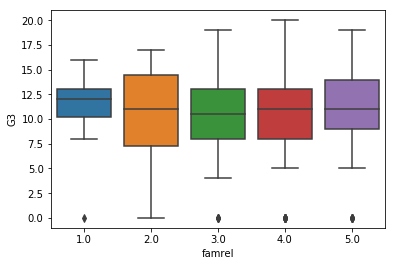

4.0    0.497436
5.0    0.269231
3.0    0.166667
2.0    0.046154
1.0    0.020513
Name: famrel, dtype: float64


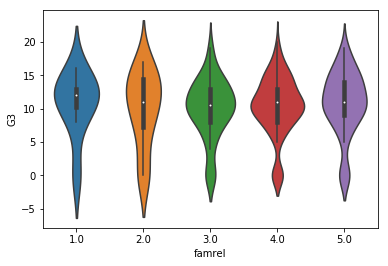

In [77]:
sns.boxplot(x=df['famrel'], y=df['G3'])
plt.show()
sns.violinplot(x=df['famrel'], y=df['G3'])
print(df['famrel'].value_counts('%'))

Intuitivamente pensaría que quienes tienen mejores relaciones familiares tendrían mejores puntajes, sin embargo según se aprecia no hay diferencias si se tiene mejores o peores relaciones familiares.

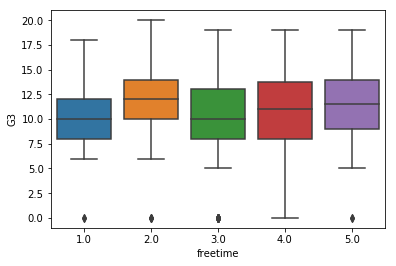

3.0    0.399491
4.0    0.290076
2.0    0.162850
5.0    0.099237
1.0    0.048346
Name: freetime, dtype: float64


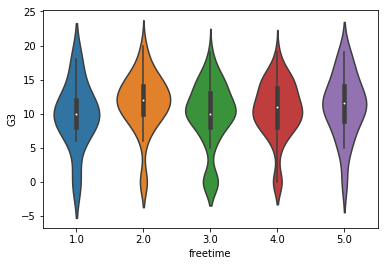

In [78]:
sns.boxplot(x=df['freetime'], y=df['G3'])
plt.show()
sns.violinplot(x=df['freetime'], y=df['G3'])
print(df['freetime'].value_counts('%'))

En cuanto al tiempo libre fuera del colegio, no parece haber mayor diferencia si se tiene más o menos.

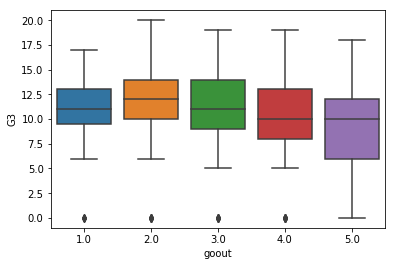

3.0    0.328205
2.0    0.264103
4.0    0.212821
5.0    0.135897
1.0    0.058974
Name: goout, dtype: float64


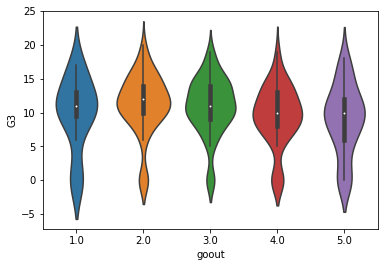

In [79]:
sns.boxplot(x=df['goout'], y=df['G3'])
plt.show()
sns.violinplot(x=df['goout'], y=df['G3'])
print(df['goout'].value_counts('%'))

Según se puede apreciar que salir un poco con amigos es positivo, sin embargo pareciera ser que existe un efecto negativo cuando las salidas son muchas.

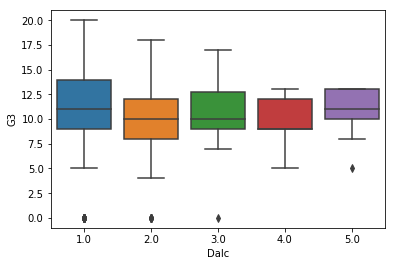

1.0    0.698980
2.0    0.188776
3.0    0.066327
4.0    0.022959
5.0    0.022959
Name: Dalc, dtype: float64


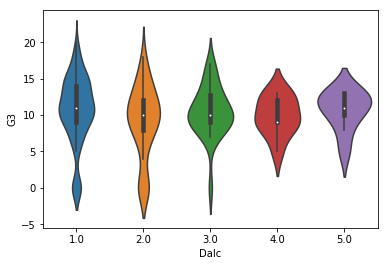

In [80]:
sns.boxplot(x=df['Dalc'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Dalc'], y=df['G3'])
print(df['Dalc'].value_counts('%'))

Quienes menos consumen alcohol en la semana tienen los mayores puntajes, y llegan a los más altos. Ahora igual la difrencia no es tanto, aunque si es interesante notar como los máximos van decayendo a meidda de haber más consumo.

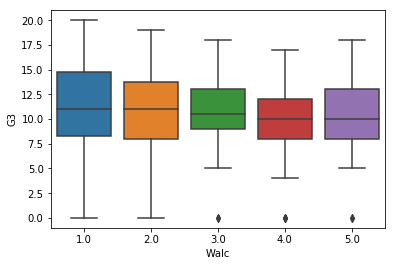

1.0    0.384615
2.0    0.210256
3.0    0.202564
4.0    0.130769
5.0    0.071795
Name: Walc, dtype: float64


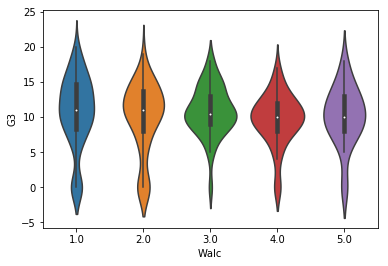

In [81]:
sns.boxplot(x=df['Walc'], y=df['G3'])
plt.show()
sns.violinplot(x=df['Walc'], y=df['G3'])
print(df['Walc'].value_counts('%'))

En cuanto al consumo del fin de semana, no se aprecia mayor diferencia si se consume más o menos.

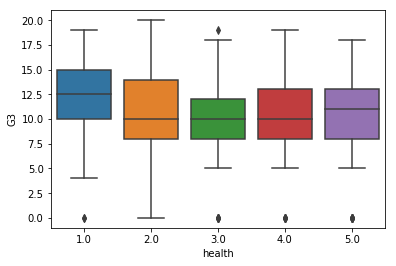

5.0    0.370844
3.0    0.232737
4.0    0.168798
2.0    0.115090
1.0    0.112532
Name: health, dtype: float64


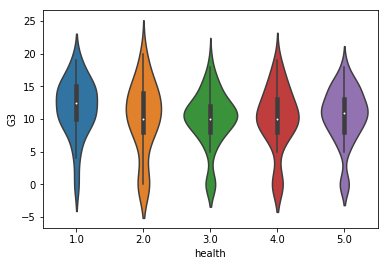

In [82]:
sns.boxplot(x=df['health'], y=df['G3'])
plt.show()
sns.violinplot(x=df['health'], y=df['G3'])
print(df['health'].value_counts('%'))

No se aprecian mayores diferencia en los resultados de acuerdo al estado de salud mental. Intuitivamente pensaría que mientras mejor se tendrían mejores resultados.

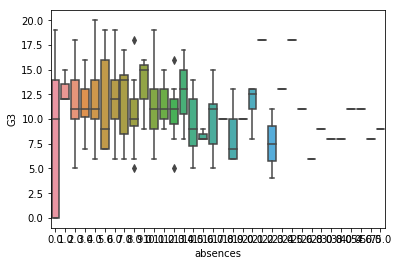

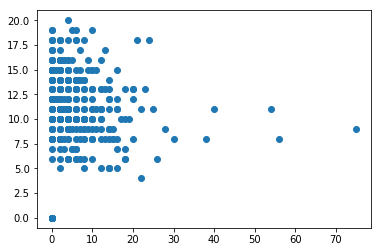

In [83]:
sns.boxplot(x=df['absences'], y=df['G3'])
plt.show()
plt.scatter(x=df['absences'], y=df['G3'])
#print(df['absences'].value_counts('%'))

En cuanto a asuencias, visualmente no veo mayor diferencia en los puntejes para quienes faltan más o menos.

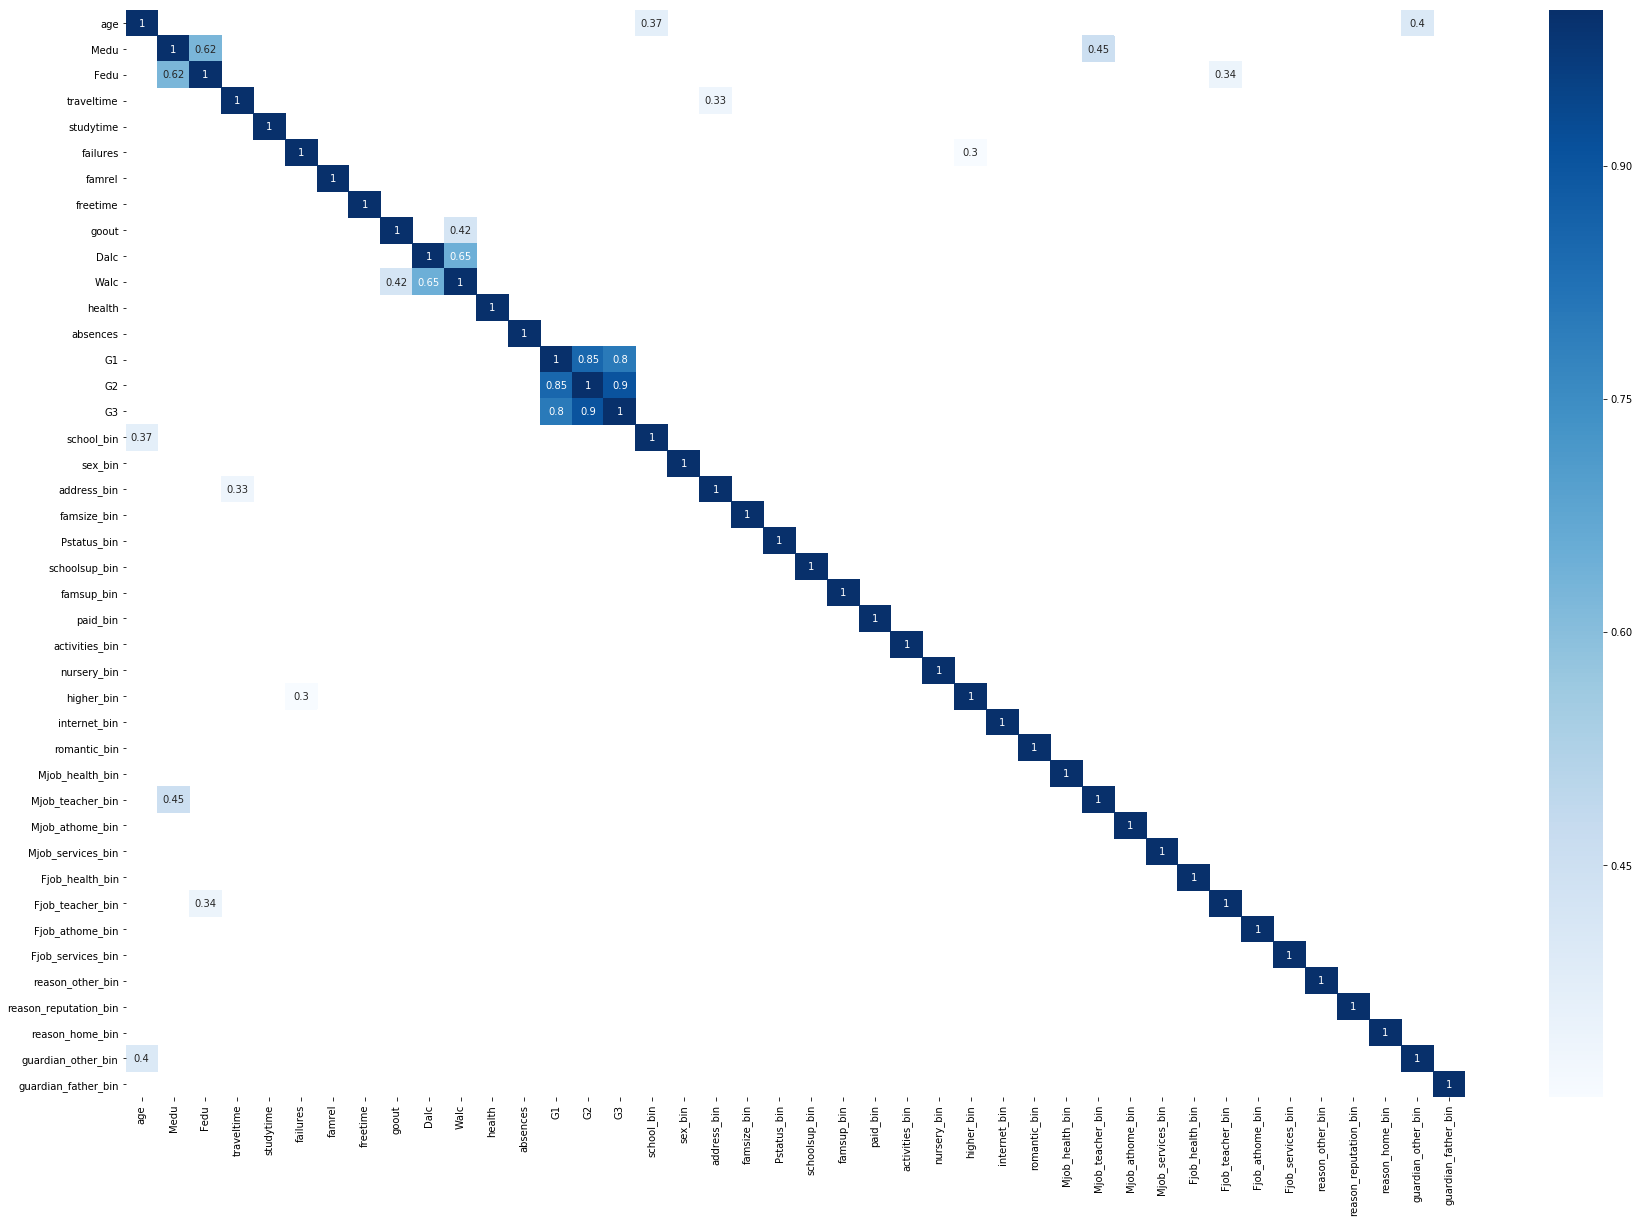

In [84]:
plt.figure(figsize=(30,20))
M=df.corr()
sns.heatmap(M[M>.3], cmap='Blues', annot=True)

Entre las variables Walc y Dalc, y Fedu y Medu tienen una correlación sobre 0.6.

Y tiene sentido que quienes consumen alcohol en la semana también lo hagan el fin de semana, y de los padres que tengan nivel educacional similar entre ellos.

Entre G1, G2 y G3 se ve una alta correlación, algo que vimos en el gráfico al indicar que tenían comportamiento similares.

In [85]:
stats.ttest_ind(df['Walc'].dropna(), df['Dalc'].dropna())

Ttest_indResult(statistic=10.227271655146282, pvalue=3.9945476983234235e-23)

In [86]:
stats.ttest_ind(df['Fedu'].dropna(), df['Medu'].dropna())

Ttest_indResult(statistic=-2.774578649966402, pvalue=0.005659510133093081)

Revisando una prueba de hipótesis entre ambos para ver si estadísticamente se pueden considerar iguales, vemos que en ambos casos se rechaza la hipótesis nula entonces podemos con un 95% de certeza decir que estas variables no son iguales, por lo tanto trabajaremos con todas ellas para la modelación descriptiva.

# Modelación Descriptiva

Haremos un análisis factorial con las variables entre famrel y health para ver si es posible si es posible abstraer ctegorías latentes.

In [87]:
df_nn = df.dropna().reset_index(drop=True)
df_fact_dropna = df_nn.loc[:, 'famrel' : 'health']

In [88]:
factor.calculate_bartlett_sphericity(df_fact_dropna)

(258.56840355580016, 1.0103392888965118e-46)

Como el p-value asociado es menor a 0.05, concluímos que nuestra matriz no es de identidad y hay covarianza entre los items.

In [89]:
factor.calculate_kmo(df_fact_dropna)

(               KMO
 famrel    0.503497
 freetime  0.578644
 goout     0.618506
 Dalc      0.588351
 Walc      0.557151
 health    0.594361, 0.5784452766434514)

Sin embargo al hacer la prueba KMO, obtenemos que todos los valores son bajo 0.7, por lo tanto como no se cumple este criterio no seguiremos con el análisis factorial.

In [90]:
df2 = df

In [91]:
df2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_bin', 'sex_bin',
       'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin',
       'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin',
       'internet_bin', 'romantic_bin', 'Mjob_health_bin', 'Mjob_teacher_bin',
       'Mjob_athome_bin', 'Mjob_services_bin', 'Fjob_health_bin',
       'Fjob_teacher_bin', 'Fjob_athome_bin', 'Fjob_services_bin',
       'reason_other_bin', 'reason_reputation_bin', 'reason_home_bin',
       'guardian_other_bin', 'guardian_father_bin'],
      dtype='object')

In [92]:
categorical_colums = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 
                      'nursery', 'higher', 'internet', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian']

for cat in categorical_colums:
    df2 = df2.drop(cat, axis=1)

In [93]:
df2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_services_bin,Fjob_health_bin,Fjob_teacher_bin,Fjob_athome_bin,Fjob_services_bin,reason_other_bin,reason_reputation_bin,reason_home_bin,guardian_other_bin,guardian_father_bin
0,NaN,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,0,0,0,0,0,1,0,0,0,0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0,0,0,0,1,0,0,1,0,0
4,NaN,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,...,1,0,0,0,1,0,0,0,1,0
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,...,1,0,0,0,1,0,0,0,0,0
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,...,0,0,0,0,0,0,0,0,1,0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0


In [94]:
df2.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_bin', 'sex_bin', 'address_bin', 'famsize_bin',
       'Pstatus_bin', 'schoolsup_bin', 'famsup_bin', 'paid_bin',
       'activities_bin', 'nursery_bin', 'higher_bin', 'internet_bin',
       'romantic_bin', 'Mjob_health_bin', 'Mjob_teacher_bin',
       'Mjob_athome_bin', 'Mjob_services_bin', 'Fjob_health_bin',
       'Fjob_teacher_bin', 'Fjob_athome_bin', 'Fjob_services_bin',
       'reason_other_bin', 'reason_reputation_bin', 'reason_home_bin',
       'guardian_other_bin', 'guardian_father_bin'],
      dtype='object')

In [95]:
for i in df2.columns:
    print(i)

age
Medu
Fedu
traveltime
studytime
failures
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3
school_bin
sex_bin
address_bin
famsize_bin
Pstatus_bin
schoolsup_bin
famsup_bin
paid_bin
activities_bin
nursery_bin
higher_bin
internet_bin
romantic_bin
Mjob_health_bin
Mjob_teacher_bin
Mjob_athome_bin
Mjob_services_bin
Fjob_health_bin
Fjob_teacher_bin
Fjob_athome_bin
Fjob_services_bin
reason_other_bin
reason_reputation_bin
reason_home_bin
guardian_other_bin
guardian_father_bin


In [96]:
variables = ""
for i in df2.columns:
    if i == 'age':
        variables = i
    else:
        variables = variables + ' + ' + i

variables

'age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2 + G3 + school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + Mjob_health_bin + Mjob_teacher_bin + Mjob_athome_bin + Mjob_services_bin + Fjob_health_bin + Fjob_teacher_bin + Fjob_athome_bin + Fjob_services_bin + reason_other_bin + reason_reputation_bin + reason_home_bin + guardian_other_bin + guardian_father_bin'

### Comenzaremos con los análisis de G1, G2 y G3. Partimos con G1.

In [97]:
m1_logit = smf.ols('G1 ~ age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + Mjob_health_bin + Mjob_teacher_bin + Mjob_athome_bin + Mjob_services_bin + Fjob_health_bin + Fjob_teacher_bin + Fjob_athome_bin + Fjob_services_bin + reason_other_bin + reason_reputation_bin + reason_home_bin + guardian_other_bin + guardian_father_bin', df2).fit()
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     3.898
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           9.24e-12
Time:                        23:50:36   Log-Likelihood:                -822.23
No. Observations:                 341   AIC:                             1724.
Df Residuals:                     301   BIC:                             1878.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.1039      3.055      2.653      0.008       2.092      14.116
age                       0.0056      0.167      0.033      0.973      -0.324       0.335
Medu                      0.1401      0.249      0.563      0.574      -0.350       0.630
Fedu                      0.1532      0.205      0.749      0.454      -0.249       0.556
traveltime                0.1261      0.258      0.489      0.625      -0.382       0.634
studytime                 0.7006      0.220      3.190      0.002       0.268       1.133
failures                 -1.2992      0.255     -5.098      0.000      -1.801      -0.798
famrel                    0.0719      0.187      0.384      0.701      -0.297       0.441
freetime                  0.3772      0.176      2.145      0.033       0.031       0.723
goout                    -0.6091      0.174     -3.509      0.001      -0.951      -0.267
Dalc                     -0.0036      0.254     -0.014      0.989      -0.503       0.496
Walc                      0.0317      0.185      0.172      0.864      -0.332       0.396
health                   -0.1839      0.126     -1.459      0.146      -0.432       0.064
absences                  0.0086      0.021      0.401      0.688      -0.033       0.050
school_bin               -0.0928      0.596     -0.156      0.876      -1.266       1.081
sex_bin                   0.7177      0.384      1.868      0.063      -0.039       1.474
address_bin              -0.3405      0.441     -0.772      0.441      -1.208       0.527
famsize_bin               0.5084      0.376      1.353      0.177      -0.231       1.248
Pstatus_bin               0.0383      0.571      0.067      0.947      -1.085       1.161
schoolsup_bin            -1.8020      0.505     -3.568      0.000      -2.796      -0.808
famsup_bin                1.0554      0.366      2.880      0.004       0.334       1.776
paid_bin                 -0.0218      0.361     -0.060      0.952      -0.732       0.689
activities_bin            0.4435      0.333      1.330      0.185      -0.213       1.100
nursery_bin               0.0178      0.414      0.043      0.966      -0.796       0.832
higher_bin               -1.2215      0.787     -1.552      0.122      -2.771       0.328
internet_bin             -0.1182      0.463     -0.255      0.799      -1.029       0.793
romantic_bin             -0.2584      0.358     -0.722      0.471      -0.962       0.446
Mjob_health_bin           1.8649      0.692      2.695      0.007       0.503       3.227
Mjob_teacher_bin         -0.3666      0.620     -0.591      0.555      -1.587       0.854
Mjob_athome_bin           0.8818      0.540      1.634      0.103      -0.180       1.944
Mjob_services_bin         1.1576      0.449      2.579      0.010       0.274       2.041
Fjob_health_bin        

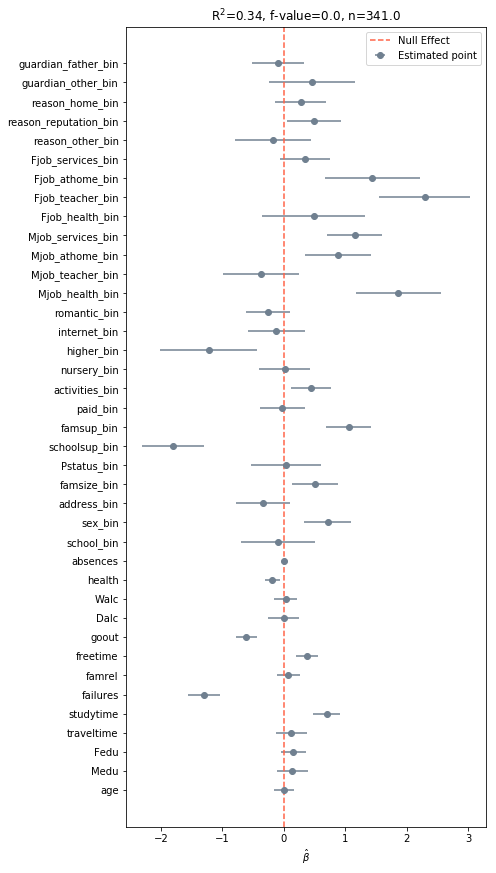

In [98]:
hp.coefplot(m1_logit)

In [99]:
m1_logit = smf.ols('G1 ~ sex_bin + studytime + failures + freetime + goout + schoolsup_bin + famsup_bin + Mjob_health_bin + Mjob_services_bin + Fjob_teacher_bin', df2).fit()
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     14.73
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.90e-22
Time:                        23:50:38   Log-Likelihood:                -917.25
No. Observations:                 375   AIC:                             1857.
Df Residuals:                     364   BIC:                             1900.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5123      0.784     12.126      0.000       7.970      11.055
sex_bin               0.6377      0.320      1.991      0.047       0.008       1.267
studytime             0.7430      0.190      3.913      0.000       0.370       1.116
failures             -1.4562      0.208     -7.000      0.000      -1.865      -1.047
freetime              0.2476      0.157      1.575      0.116      -0.062       0.557
goout                -0.4669      0.139     -3.356      0.001      -0.741      -0.193
schoolsup_bin        -1.9545      0.449     -4.353      0.000      -2.838      -1.071
famsup_bin            0.8497      0.315      2.698      0.007       0.230       1.469
Mjob_health_bin       1.8780      0.533      3.526      0.000       0.831       2.925
Mjob_services_bin     1.2630      0.345      3.657      0.000       0.584       1.942
Fjob_teacher_bin      2.0604      0.564      3.654      0.000       0.952       3.169
==============================================================================
Omnibus:                        6.531   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.951
Skew:                           0.167   Prob(JB):                       0.0841
Kurtosis:                       2.547   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

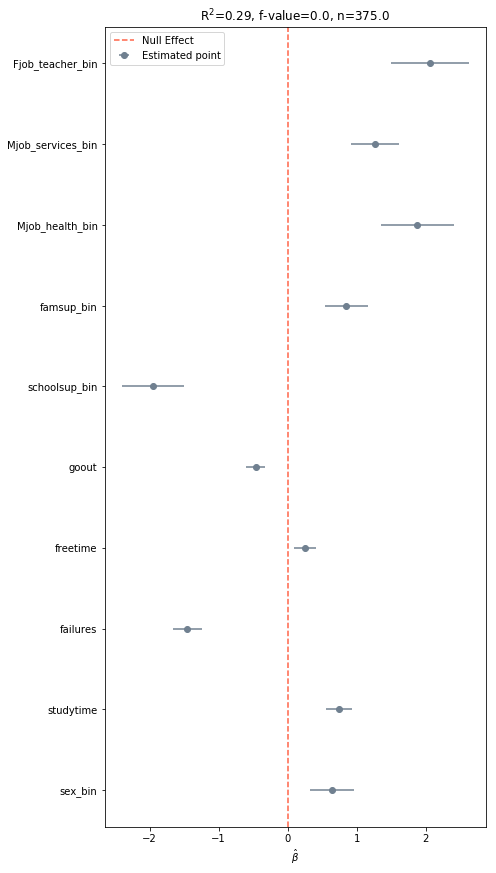

In [100]:
hp.coefplot(m1_logit)

In [101]:
m1_logit = smf.ols('G1 ~ sex_bin + studytime + failures + goout + schoolsup_bin + famsup_bin + Mjob_health_bin + Mjob_services_bin + Fjob_teacher_bin', df2).fit()
m1_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     15.86
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           6.00e-22
Time:                        23:50:38   Log-Likelihood:                -925.58
No. Observations:                 377   AIC:                             1871.
Df Residuals:                     367   BIC:                             1910.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1176      0.675     14.979      0.000       8.789      11.446
sex_bin               0.7589      0.317      2.397      0.017       0.136       1.382
studytime             0.6696      0.189      3.539      0.000       0.298       1.042
failures             -1.4585      0.209     -6.963      0.000      -1.870      -1.047
goout                -0.3632      0.134     -2.720      0.007      -0.626      -0.101
schoolsup_bin        -1.9680      0.452     -4.351      0.000      -2.857      -1.079
famsup_bin            0.7990      0.314      2.541      0.011       0.181       1.417
Mjob_health_bin       1.8140      0.536      3.384      0.001       0.760       2.868
Mjob_services_bin     1.1809      0.346      3.412      0.001       0.500       1.861
Fjob_teacher_bin      2.2414      0.559      4.011      0.000       1.142       3.340
==============================================================================
Omnibus:                        8.491   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                5.703
Skew:                           0.156   Prob(JB):                       0.0578
Kurtosis:                       2.484   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Seguimos con el análisis de G2.

In [102]:
m2_logit = smf.ols('G2 ~ age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + Mjob_health_bin + Mjob_teacher_bin + Mjob_athome_bin + Mjob_services_bin + Fjob_health_bin + Fjob_teacher_bin + Fjob_athome_bin + Fjob_services_bin + reason_other_bin + reason_reputation_bin + reason_home_bin + guardian_other_bin + guardian_father_bin', df2).fit()
m2_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.640
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.11e-10
Time:                        23:50:39   Log-Likelihood:                -881.44
No. Observations:                 345   AIC:                             1843.
Df Residuals:                     305   BIC:                             1997.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.5131      3.512      3.563      0.000       5.602      19.424
age                      -0.1545      0.192     -0.803      0.423      -0.533       0.224
Medu                      0.2426      0.284      0.856      0.393      -0.315       0.801
Fedu                     -0.0529      0.235     -0.225      0.822      -0.515       0.409
traveltime               -0.1696      0.296     -0.572      0.568      -0.753       0.414
studytime                 0.6786      0.253      2.685      0.008       0.181       1.176
failures                 -1.3279      0.282     -4.708      0.000      -1.883      -0.773
famrel                   -0.0201      0.216     -0.093      0.926      -0.445       0.405
freetime                  0.3130      0.203      1.544      0.124      -0.086       0.712
goout                    -0.8060      0.199     -4.054      0.000      -1.197      -0.415
Dalc                     -0.0823      0.292     -0.282      0.778      -0.658       0.493
Walc                      0.2298      0.211      1.088      0.277      -0.186       0.646
health                   -0.2590      0.144     -1.794      0.074      -0.543       0.025
absences                  0.0085      0.024      0.349      0.727      -0.040       0.057
school_bin                0.3235      0.688      0.470      0.638      -1.030       1.677
sex_bin                   0.8662      0.441      1.963      0.051      -0.002       1.735
address_bin              -0.7647      0.506     -1.512      0.132      -1.760       0.231
famsize_bin               0.8154      0.429      1.902      0.058      -0.028       1.659
Pstatus_bin               0.4656      0.657      0.708      0.479      -0.828       1.759
schoolsup_bin            -1.2288      0.572     -2.148      0.032      -2.354      -0.103
famsup_bin                1.0740      0.417      2.575      0.011       0.253       1.895
paid_bin                  0.5079      0.413      1.229      0.220      -0.305       1.321
activities_bin            0.2420      0.383      0.631      0.528      -0.512       0.996
nursery_bin              -0.1458      0.476     -0.306      0.760      -1.083       0.791
higher_bin               -1.3202      0.906     -1.458      0.146      -3.102       0.462
internet_bin             -0.5152      0.530     -0.972      0.332      -1.558       0.528
romantic_bin             -0.9533      0.408     -2.339      0.020      -1.755      -0.151
Mjob_health_bin           1.5782      0.797      1.981      0.048       0.011       3.146
Mjob_teacher_bin         -0.8738      0.713     -1.226      0.221      -2.276       0.529
Mjob_athome_bin           0.1007      0.613      0.164      0.870      -1.105       1.307
Mjob_services_bin         0.7137      0.514      1.389      0.166      -0.297       1.725
Fjob_health_bin        

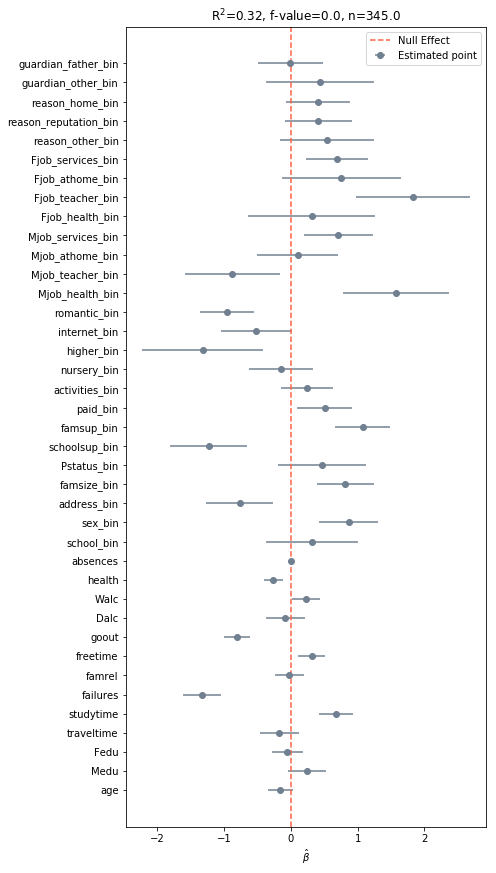

In [103]:
hp.coefplot(m2_logit)

In [104]:
m2_logit = smf.ols('G2 ~ studytime + failures + goout + health + sex_bin + famsize_bin + schoolsup_bin + famsup_bin + romantic_bin + Mjob_health_bin + Fjob_teacher_bin', df2).fit()
m2_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     10.31
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.85e-16
Time:                        23:50:39   Log-Likelihood:                -982.38
No. Observations:                 377   AIC:                             1989.
Df Residuals:                     365   BIC:                             2036.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.3331      0.918     12.347      0.000       9.528      13.138
studytime            0.6104      0.222      2.753      0.006       0.174       1.046
failures            -1.5054      0.243     -6.191      0.000      -1.984      -1.027
goout               -0.4887      0.156     -3.140      0.002      -0.795      -0.183
health              -0.1743      0.128     -1.358      0.175      -0.427       0.078
sex_bin              0.9171      0.378      2.429      0.016       0.175       1.659
famsize_bin          0.7521      0.384      1.959      0.051      -0.003       1.507
schoolsup_bin       -1.1444      0.521     -2.197      0.029      -2.169      -0.120
famsup_bin           0.6727      0.366      1.839      0.067      -0.046       1.392
romantic_bin        -0.8994      0.375     -2.396      0.017      -1.638      -0.161
Mjob_health_bin      2.0156      0.616      3.274      0.001       0.805       3.226
Fjob_teacher_bin     1.5458      0.654      2.364      0.019       0.260       2.832
==============================================================================
Omnibus:                       22.495   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.611
Skew:                          -0.514   Prob(JB):                     1.01e-06
Kurtosis:                       3.838   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

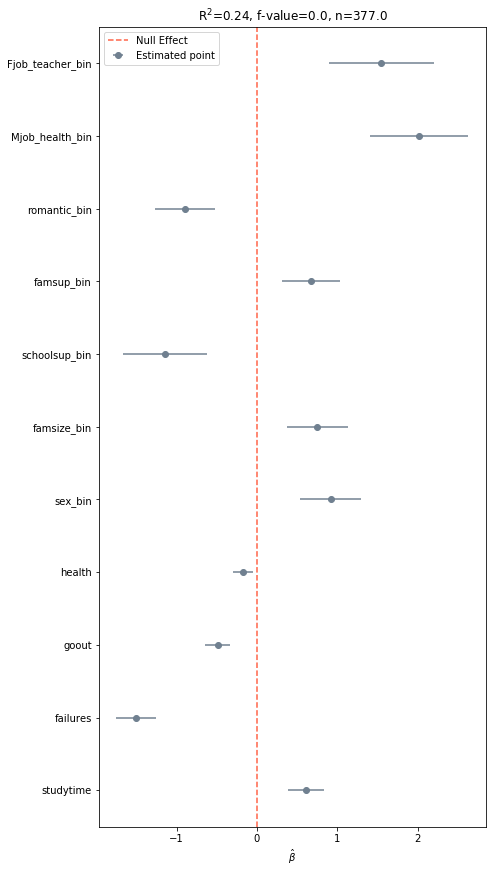

In [105]:
hp.coefplot(m2_logit)

In [106]:
m2_logit = smf.ols('G2 ~ studytime + failures + goout + sex_bin + schoolsup_bin + romantic_bin + Mjob_health_bin + Fjob_teacher_bin', df2).fit()
m2_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     12.62
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.58e-16
Time:                        23:50:40   Log-Likelihood:                -1003.1
No. Observations:                 381   AIC:                             2024.
Df Residuals:                     372   BIC:                             2060.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.2481      0.786     14.307      0.000       9.702      12.794
studytime            0.5627      0.224      2.508      0.013       0.122       1.004
failures            -1.5435      0.245     -6.305      0.000      -2.025      -1.062
goout               -0.4639      0.159     -2.926      0.004      -0.776      -0.152
sex_bin              0.9637      0.377      2.559      0.011       0.223       1.704
schoolsup_bin       -1.2844      0.529     -2.427      0.016      -2.325      -0.244
romantic_bin        -0.8677      0.381     -2.276      0.023      -1.618      -0.118
Mjob_health_bin      1.8369      0.626      2.936      0.004       0.607       3.067
Fjob_teacher_bin     1.3279      0.665      1.996      0.047       0.020       2.636
==============================================================================
Omnibus:                       26.101   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.274
Skew:                          -0.555   Prob(JB):                     5.95e-08
Kurtosis:                       3.930   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ahora el análisis de G3.

In [107]:
m3_logit = smf.ols('G3 ~ age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + Mjob_health_bin + Mjob_teacher_bin + Mjob_athome_bin + Mjob_services_bin + Fjob_health_bin + Fjob_teacher_bin + Fjob_athome_bin + Fjob_services_bin + reason_other_bin + reason_reputation_bin + reason_home_bin + guardian_other_bin + guardian_father_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.726
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.88e-11
Time:                        23:50:40   Log-Likelihood:                -940.25
No. Observations:                 343   AIC:                             1960.
Df Residuals:                     303   BIC:                             2114.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.3059      4.240      2.666      0.008       2.962      19.650
age                      -0.2295      0.233     -0.985      0.326      -0.688       0.229
Medu                      0.4801      0.342      1.405      0.161      -0.192       1.153
Fedu                     -0.2438      0.283     -0.860      0.390      -0.801       0.314
traveltime               -0.1158      0.366     -0.316      0.752      -0.836       0.605
studytime                 0.6288      0.305      2.062      0.040       0.029       1.229
failures                 -1.7208      0.347     -4.962      0.000      -2.403      -1.038
famrel                    0.3356      0.260      1.290      0.198      -0.176       0.848
freetime                  0.4244      0.245      1.734      0.084      -0.057       0.906
goout                    -1.0204      0.240     -4.255      0.000      -1.492      -0.549
Dalc                     -0.4630      0.356     -1.302      0.194      -1.163       0.237
Walc                      0.5550      0.256      2.166      0.031       0.051       1.059
health                   -0.1923      0.174     -1.104      0.270      -0.535       0.150
absences                  0.0452      0.029      1.535      0.126      -0.013       0.103
school_bin                0.9039      0.830      1.089      0.277      -0.730       2.538
sex_bin                   1.1138      0.533      2.088      0.038       0.064       2.163
address_bin              -0.9039      0.611     -1.479      0.140      -2.107       0.299
famsize_bin               0.8696      0.517      1.681      0.094      -0.149       1.888
Pstatus_bin               0.8092      0.803      1.008      0.314      -0.771       2.389
schoolsup_bin            -1.1290      0.690     -1.636      0.103      -2.487       0.229
famsup_bin                1.0532      0.504      2.089      0.038       0.061       2.045
paid_bin                  0.5493      0.498      1.102      0.271      -0.431       1.530
activities_bin            0.6633      0.463      1.432      0.153      -0.248       1.575
nursery_bin              -0.0651      0.575     -0.113      0.910      -1.197       1.067
higher_bin               -2.1664      1.100     -1.969      0.050      -4.332      -0.001
internet_bin             -0.4021      0.641     -0.627      0.531      -1.663       0.859
romantic_bin             -1.0943      0.492     -2.222      0.027      -2.063      -0.125
Mjob_health_bin           1.3691      0.961      1.425      0.155      -0.522       3.260
Mjob_teacher_bin         -1.2284      0.860     -1.429      0.154      -2.920       0.463
Mjob_athome_bin           0.1071      0.742      0.144      0.885      -1.352       1.567
Mjob_services_bin         0.7097      0.623      1.140      0.255      -0.515       1.935
Fjob_health_bin        

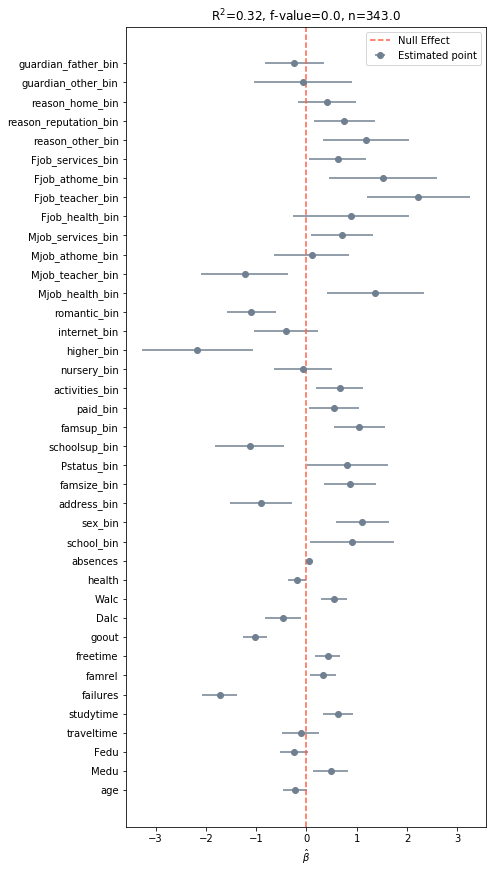

In [108]:
hp.coefplot(m3_logit)

In [109]:
m3_logit = smf.ols('G3 ~ studytime + failures + freetime + goout + Walc + sex_bin + famsup_bin + higher_bin + romantic_bin + Fjob_teacher_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     9.503
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.61e-14
Time:                        23:50:40   Log-Likelihood:                -1049.3
No. Observations:                 372   AIC:                             2121.
Df Residuals:                     361   BIC:                             2164.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.1461      1.169      8.678      0.000       7.847      12.445
studytime            0.5605      0.283      1.983      0.048       0.005       1.117
failures            -2.0292      0.317     -6.399      0.000      -2.653      -1.406
freetime             0.3042      0.230      1.322      0.187      -0.148       0.757
goout               -0.7133      0.223     -3.205      0.001      -1.151      -0.276
Walc                 0.2238      0.198      1.132      0.258      -0.165       0.612
sex_bin              1.0667      0.480      2.224      0.027       0.124       2.010
famsup_bin           0.7460      0.452      1.651      0.100      -0.143       1.635
higher_bin          -2.1064      1.044     -2.017      0.044      -4.160      -0.052
romantic_bin        -0.6995      0.465     -1.503      0.134      -1.614       0.215
Fjob_teacher_bin     1.0581      0.838      1.263      0.208      -0.590       2.706
==============================================================================
Omnibus:                       28.789   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.632
Skew:                          -0.671   Prob(JB):                     4.98e-08
Kurtosis:                       3.605   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

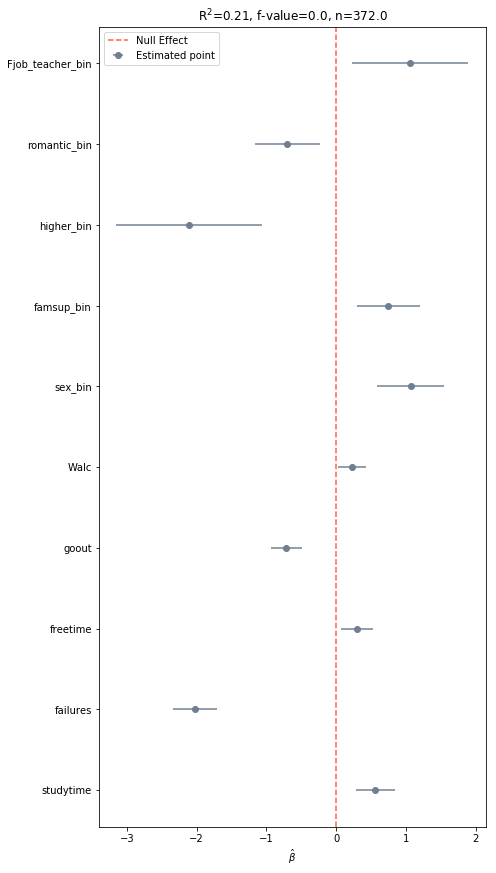

In [110]:
hp.coefplot(m3_logit)

In [111]:
m3_logit = smf.ols('G3 ~ studytime + failures + goout + sex_bin + higher_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     16.56
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           9.00e-15
Time:                        23:50:41   Log-Likelihood:                -1077.1
No. Observations:                 379   AIC:                             2166.
Df Residuals:                     373   BIC:                             2190.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3221      0.940     12.050      0.000       9.474      13.170
studytime      0.2907      0.276      1.053      0.293      -0.252       0.833
failures      -2.0606      0.311     -6.618      0.000      -2.673      -1.448
goout         -0.4487      0.195     -2.302      0.022      -0.832      -0.065
sex_bin        1.5111      0.459      3.295      0.001       0.609       2.413
higher_bin    -2.3025      1.045     -2.204      0.028      -4.357      -0.248
==============================================================================
Omnibus:                       31.297   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.149
Skew:                          -0.698   Prob(JB):                     8.57e-09
Kurtosis:                       3.637   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
m3_logit = smf.ols('G3 ~ failures + goout + sex_bin + higher_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     19.44
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.47e-14
Time:                        23:50:41   Log-Likelihood:                -1091.8
No. Observations:                 383   AIC:                             2194.
Df Residuals:                     378   BIC:                             2213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9832      0.658     18.199      0.000      10.689      13.278
failures      -2.0234      0.308     -6.563      0.000      -2.630      -1.417
goout         -0.4600      0.195     -2.359      0.019      -0.843      -0.077
sex_bin        1.3594      0.438      3.106      0.002       0.499       2.220
higher_bin    -2.1222      1.029     -2.061      0.040      -4.146      -0.098
==============================================================================
Omnibus:                       30.378   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.538
Skew:                          -0.691   Prob(JB):                     1.92e-08
Kurtosis:                       3.563   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analizando G1, G2 y G3 y eliminando las variables de acuerdo al valor estadístico, G1 es la que quedó con más variables, 9 en total, luego G2 con 8 y G3 con 4.
En cuanto al R2, en el modelo saturado en los 3 casos es mas menos similar, sin embargo en G1 terminó con un R2 más alto que G2 y G2 más alto que G3. Tomando valores de R ajustado es (G1: 0.262 ,  G2: 0.197,  G3: 0.162)
Lo otro es que las 3 variables que se repitieron en los 3 modelos son failures, goout y sex_bin.
haremos una prueba con variables que estén presentes en G1 y G2 para ver como se ajustan al agregarlos a G3.

In [113]:
m3_logit = smf.ols('G3 ~ failures + goout + sex_bin + higher_bin + Mjob_health_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     16.75
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           6.00e-15
Time:                        23:50:41   Log-Likelihood:                -1089.2
No. Observations:                 383   AIC:                             2190.
Df Residuals:                     377   BIC:                             2214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.9001      0.656     18.143      0.000      10.610      13.190
failures           -2.0075      0.307     -6.545      0.000      -2.611      -1.404
goout              -0.4881      0.194     -2.512      0.012      -0.870      -0.106
sex_bin             1.3763      0.435      3.161      0.002       0.520       2.232
higher_bin         -1.9805      1.026     -1.931      0.054      -3.997       0.037
Mjob_health_bin     1.7363      0.767      2.264      0.024       0.228       3.244
==============================================================================
Omnibus:                       30.630   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.892
Skew:                          -0.694   Prob(JB):                     1.61e-08
Kurtosis:                       3.566   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
m3_logit = smf.ols('G3 ~ failures + goout + sex_bin + Mjob_health_bin', df2).fit()
m3_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     19.86
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           7.47e-15
Time:                        23:50:41   Log-Likelihood:                -1091.1
No. Observations:                 383   AIC:                             2192.
Df Residuals:                     378   BIC:                             2212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.9126      0.658     18.098      0.000      10.618      13.207
failures           -2.1866      0.293     -7.452      0.000      -2.764      -1.610
goout              -0.4896      0.195     -2.510      0.012      -0.873      -0.106
sex_bin             1.2477      0.432      2.889      0.004       0.399       2.097
Mjob_health_bin     1.8266      0.768      2.378      0.018       0.316       3.337
==============================================================================
Omnibus:                       31.863   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.795
Skew:                          -0.705   Prob(JB):                     6.21e-09
Kurtosis:                       3.616   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En G3 al probar distintas, Mjob_health_bin fue la única que fue significativa, que a su vez al incorporarla ahora dejamos fuera a higher_bin del modelo de G3. 
Además ahora con esta nueva variable, G3 el R ajustado mejoró de 0.162 a 0.165.


Entonces para el modelo predictivo trabajaremos con estas 4 variables --> failures - goout - sex_bin - Mjob_health_bin



# Modelación Predictiva

In [115]:
def report_scores(d_validar, d_predicho):
    error = mean_squared_error(d_validar, d_predicho)
    r2 = r2_score(d_validar, d_predicho)
    print('MSE: ' + str(error) + ' , R2: ' + str(r2))
    
    #return error, r2

In [116]:
df_dropna = df.dropna()

## Modelo 1 - Saturado - Sin Intercepto - Sin Normalizar

In [117]:
y_vec = df_dropna['G3']
X_mat = df_dropna.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_bin', 'sex_bin', 'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin', 'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin', 'internet_bin', 'romantic_bin', 'Mjob_health_bin', 'Mjob_teacher_bin', 'Mjob_athome_bin', 'Mjob_services_bin', 'Fjob_health_bin', 'Fjob_teacher_bin', 'Fjob_athome_bin', 'Fjob_services_bin', 'reason_other_bin', 'reason_reputation_bin', 'reason_home_bin', 'guardian_other_bin', 'guardian_father_bin']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 22.012183420394862 , R2: -0.06882035379725338


## Modelo 2 - Saturado - Con Intercepto - Normalizado

In [119]:
y_vec = df_dropna['G3']
X_mat = df_dropna.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_bin', 'sex_bin', 'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin', 'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin', 'internet_bin', 'romantic_bin', 'Mjob_health_bin', 'Mjob_teacher_bin', 'Mjob_athome_bin', 'Mjob_services_bin', 'Fjob_health_bin', 'Fjob_teacher_bin', 'Fjob_athome_bin', 'Fjob_services_bin', 'reason_other_bin', 'reason_reputation_bin', 'reason_home_bin', 'guardian_other_bin', 'guardian_father_bin']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 21.252215435073204 , R2: -0.03191945962273479


## Modelo 3 - Depurado - Sin Intercepto - Sin Normalizar

In [121]:
y_vec = df_dropna['G3']
X_mat = df_dropna.loc[:, ['failures', 'goout', 'sex_bin', 'Mjob_health_bin']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 37.20345940202856 , R2: -0.8064457251303703


## Modelo 4 - Depurado - Con Intercepto - Normalizado

In [123]:
y_vec = df_dropna['G3']
X_mat = df_dropna.loc[:, ['failures', 'goout', 'sex_bin', 'Mjob_health_bin']]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 18.75825678719549 , R2: 0.08917683116642139


Los resultados de los 4 modelos son interesantes, ya que el modelo con el R2 más alto fue el Modelo 3, que fue -0.806, pero fue el que tuvo el MSE más alto, de 37.2.  

El que tuvo el mejor MSE fue el Modelo 4, con 18.758 pero un R2 bajo que es 0.0892.

Ahora lo que haremos será para poder utilizar mayor cantidad de datos para el modelo, es crear un subset de la base con sólo G3 y las 4 variables seleccionadas y procederemos a realizar el modelo depurado con intercepto y normalizado, y sin intercepto y sin normalizar.

In [125]:
df2 = df.loc[:, ['G3', 'failures', 'goout', 'sex_bin', 'Mjob_health_bin']].dropna()

## Modelo 5 - Depurado - Sin Intercepto - Sin Normalizar - Base Subset con Variables Depuradas

In [126]:
y_vec = df2['G3']
X_mat = df2.loc[:, ['failures', 'goout', 'sex_bin', 'Mjob_health_bin']]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 33.53935878936428 , R2: -0.5686440656785918


## Modelo 6 - Depurado - Con Intercepto - Normalizado - Base Subset con Variables Depuradas

In [128]:
y_vec = df2['G3']
X_mat = df2.loc[:, ['failures', 'goout', 'sex_bin', 'Mjob_health_bin']]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33, random_state=11238)
modelo = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
yhat = modelo.predict(X_test)
report_scores(y_test, yhat)

MSE: 15.978652420332518 , R2: 0.25267449344786475


El Modelo 5 dio un R de -0.568, sin embargo el MSE es de 33.539 que es bastante alto.

Si lo comparamos con el modelo 3 que tb es el depurado sin intercepto y sin normalizar, tiene un mejor MSE pero R2 más bajo.

Ahora el Modelo 6 es el que de entre todos los modelos entrega el MSE más bajo, que es de 15.979, y el R2 es de 0.252, que si lo comparamos con el Modelo 4, acá hay una mejora importante tanto en MSE con en R2.

En conclusión de entre estos 6 modelos, el Modelo 6 sería el cual eligiría entre todos, ya que es el que tiene el menor MSE y tiene un R2 que es bajo sin embargo hay una correlación, a diferencia de otros modelos donde la correlación estaba cercano a 0.


Aún así, aunque el Modelo 6 sea el mejor, igualmente considero que los modelos obtenidos no son muy satisfactorios o son los mejores modelos